# Week 6
## Data retrieval and dataset preprocessing.
  
  
Ayal Gussow, 03/09/2018

# Basic Outline
  
  
* Where do data come from? Data retreival.
* Ideal datasets and data types
* Common wrangling needs and implementations
* In-Class / HW Assignment

# Where did you get your data?



* Generated in-house (stored as CSVs, TSVs, proprietary, etc)

* Collaborators

* Public sources

# Let's see an example: Breast Cancer Gene Expression

In [4]:
import urllib

URL = "https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/protein_expression.BRCA-US.tsv.gz"
FILENAME = "brca_protein_expression.tsv.gz"

urllib.request.urlretrieve(URL, FILENAME)

('brca_protein_expression.tsv.gz', <http.client.HTTPMessage at 0x7fbf6ddd7320>)

* Let's open it in excel


* Note on scraping: Mechanize and BeautifulSoup  



# Pandas is the answer to everything

In [3]:
# Since we will be plotting...
import matplotlib.pyplot as plt
%matplotlib inline

# Pandas is great for reading and working with data
import pandas as pd

# Let's read with pandas
brca_data = pd.read_table(FILENAME, sep="\t")

brca_data.head()

NameError: name 'FILENAME' is not defined


# Pandas is the answer to everything

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html
* sep="\t"
* header=0
* index_col=None


# Once data are loaded into Pandas, the sky is the limit

* Pandas is *incredibly useful* for data wrangling

* sklearn is happy to accept Pandas as input

* Pandas is built for stat tests / ML

In [5]:
brca_data['normalized_expression_level'].hist()

NameError: name 'brca_data' is not defined

# Pre-processing a dataset: when are ready for ML?

* Ideally, data are organized as sample-by-feature

* Data from multiple sources are combined

* Missing data are handled

* Features have been combined and manipulated as needed

* Any data that need to be normalized have been normalized

* Data are of the correct type (e.g. categorical vs continuous, boolean vs int)

# Let's have a look at Boston housing prices

In [6]:
boston = pd.read_table("boston_data.csv", sep=",")
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice
0,1,65.0,Y,856,Normal,208500
1,2,80.0,Y,1262,Normal,181500
2,3,68.0,Y,920,Normal,223500
3,4,60.0,Y,961,Abnorml,140000
4,5,84.0,Y,1145,Normal,250000


# Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as sample-by-feature~~
* Data from multiple sources are combined
* Missing data are handled
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

# Combining data from multiple sources

In [7]:
boston_second_floor = pd.read_table("boston_second_floor.csv", sep=",")
boston_second_floor.head()
#boston.head()

,Id,2ndFlrSF
0,2,0
1,1,854
2,3,866
3,4,756
4,5,1053


# Combining data from multiple sources

In [8]:
# Let's combine boston and boston second floor
boston = pd.merge(boston, boston_second_floor, on="Id")
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF
0,1,65.0,Y,856,Normal,208500,854
1,2,80.0,Y,1262,Normal,181500,0
2,3,68.0,Y,920,Normal,223500,866
3,4,60.0,Y,961,Abnorml,140000,756
4,5,84.0,Y,1145,Normal,250000,1053


In [9]:
# Let's add some additional data
boston3 = pd.read_table("boston_additional.csv", sep=",")
boston3.head()

,Id,CentralAir,1stFlrSF,SaleCondition,SalePrice,LotFrontage
0,44,Y,938,Normal,130250,NaN
1,45,Y,1150,Normal,141000,70.0
2,46,Y,1752,Normal,319900,61.0


In [ ]:
# Let's add some additional data
boston = pd.concat([boston, boston3])
boston.tail()

# Thus far

In [ ]:
boston.head()
#boston.shape
#boston.tail()

# Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as sample-by-feature~~
* ~~Data from multiple sources are combined~~
* Missing data are handled
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

# Missing data
There are a number of ways to handle missing data:

* Drop all records with a value missing (simplest, but can lead to bias)
* Substitute all missing values with an approximated value (usually depends on data and algorithm)
* Add additional feature indicating when a value is missing

# Missing data

In [1]:
# Drop all records with missing data
boston.isnull()
#boston.isnull().sum()
#boston.isnull().sum().sum()
#boston.tail()
#boston.dropna().tail()
#boston.dropna().isnull().sum()

NameError: name 'boston' is not defined

In [ ]:
# Substitute missing values
boston.fillna("Value!").tail()
#boston.fillna({"2ndFlrSF": "Value1!", "LotFrontage": "Value2!"}).tail()

In [ ]:
# Substitute missing values with mean
print(boston.mean())
#boston.fillna(boston.mean()).tail()
#boston.fillna(boston.median()).tail()

In [ ]:
# Add column indicating missing values
boston["2ndFlrSF"].isnull()
##boston["missing_second_floor"] = boston["2ndFlrSF"].isnull()
#boston.tail()
#boston = boston.fillna(boston.mean())
#boston.tail()

# How to decide how to treat missing data?
* Very data-dependent!
* Don't create data from nothing
* Iris example
* Politics example (2)

# Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as sample-by-feature~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* Features have been combined and manipulated as needed
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

In [15]:
boston.head()
boston["total_sf"] = boston["1stFlrSF"] + boston["2ndFlrSF"]
#boston.head()

In [16]:
boston.head()
boston = boston.replace({"Abnorml": "abnormal", "Normal": "normal"})
boston.head()

,Id,LotFrontage,CentralAir,1stFlrSF,SaleCondition,SalePrice,2ndFlrSF,total_sf
0,1,65.0,Y,856,normal,208500,854,1710
1,2,80.0,Y,1262,normal,181500,0,1262
2,3,68.0,Y,920,normal,223500,866,1786
3,4,60.0,Y,961,abnormal,140000,756,1717
4,5,84.0,Y,1145,normal,250000,1053,2198


# Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as sample-by-feature~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* Any data that need to be normalized have been normalized
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

# Normalization
* What is it?
* Why do it? (data sources, feature distributions)
* Types?

## Standardization / Z-Score Normalization
$$z = \frac{x - \mu}{\sigma}$$

/home/timor/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


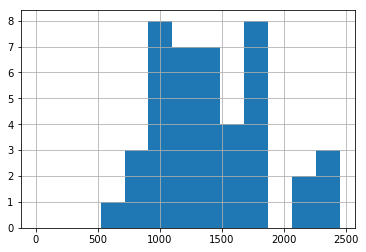

In [21]:
# can scale with sklearn
boston.head()
boston.total_sf.hist()
from sklearn.preprocessing import scale
scaled_size = pd.Series(scale(boston.total_sf))
scaled_size.hist()
scaled_size.mean()
scaled_size.std(ddof=0)
boston["normalized_total_sf"] = scaled_size

## Other preprocessing / normalization techniques and thoughts
* http://scikit-learn.org/stable/modules/preprocessing.html
* http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html

# Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as sample-by-feature~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* ~~Any data that need to be normalized have been normalized~~
* Data are of correct type (e.g. categorical vs continuous, boolean vs int)

In [ ]:
boston.head()
#boston["CentralAir_bool"] = boston["CentralAir"] == "Y"
#boston.head()
#boston["CentralAir_bool"].dtype
#boston["SaleCondition"].head()
#boston["SaleCondition"].astype("category").dtype
#boston["SaleCondition"] = boston["SaleCondition"].astype("category")
#boston["SaleCondition"].dtype

# Pre-processing a dataset: when are ready for ML?
* ~~Ideally, data are organized as sample-by-feature~~
* ~~Data from multiple sources are combined~~
* ~~Missing data are handled~~
* ~~Features have been combined and manipulated as needed~~
* ~~Any data that need to be normalized have been normalized~~
* ~~Data are of correct type (e.g. categorical vs continuous, boolean vs int)~~

# Other types of data storage
* Image
* Text
* SQL